In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


# Predicting Titanic Survivors: The Beginning of My ML Journey

Hey! I’m Shreyash Sinha, a student and a curious soul learning ML step-by-step.  
This is my take on the classic Titanic dataset

In this notebook, I’ll walk through:
- Data cleaning & preprocessing
- Exploratory Data Analysis (EDA)
- Feature engineering
- Model building and evaluation

I hope this notebook not only helps me learn, but maybe helps someone else too.

## 1. Understanding the Data|

In [2]:
train_df=pd.read_csv('/kaggle/input/titanic/train.csv')
test_df=pd.read_csv('/kaggle/input/titanic/test.csv')
#df stands for dataframe pandas for readcsv()
pd.set_option('display.max_columns', None)

In [3]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
train_df.shape

(891, 12)

## 2. Data cleaning & preprocessing

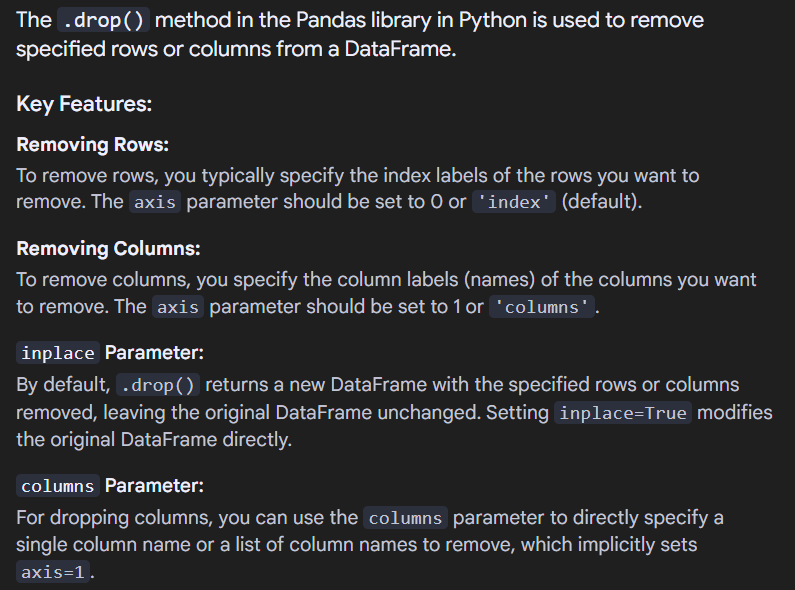

In [5]:
train_df.drop(['PassengerId','Ticket','Cabin'],axis=1,inplace=True)
test_passenger_ids = test_df['PassengerId']
test_df.drop(['PassengerId','Ticket','Cabin'],axis=1,inplace=True)

In [6]:
train_df['Age'].describe

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


<bound method NDFrame.describe of 0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888     NaN
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64>

In [7]:
train_df['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

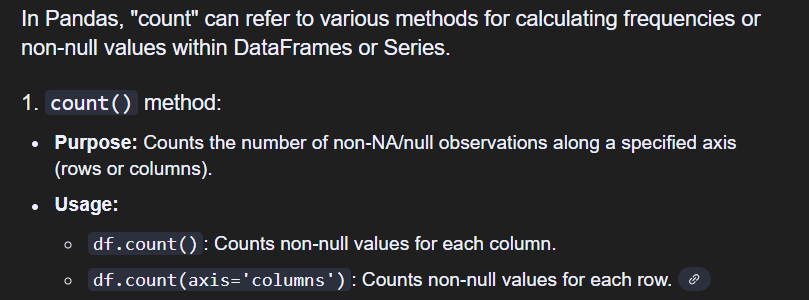

In [8]:
train_df.fillna(train_df['Age'].median(),inplace=True)
test_df.fillna(test_df['Age'].median(),inplace=True)

In [9]:
train_df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.361582,0.523008,0.381594,32.204208
std,0.486592,0.836071,13.019697,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [10]:
print(train_df['Age'].median())

28.0


In [11]:
list_df=list(train_df['Embarked'])
print(list_df)

['S', 'C', 'S', 'S', 'S', 'Q', 'S', 'S', 'S', 'C', 'S', 'S', 'S', 'S', 'S', 'S', 'Q', 'S', 'S', 'C', 'S', 'S', 'Q', 'S', 'S', 'S', 'C', 'S', 'Q', 'S', 'C', 'C', 'Q', 'S', 'C', 'S', 'C', 'S', 'S', 'C', 'S', 'S', 'C', 'C', 'Q', 'S', 'Q', 'Q', 'C', 'S', 'S', 'S', 'C', 'S', 'C', 'S', 'S', 'C', 'S', 'S', 'C', 28.0, 'S', 'S', 'C', 'C', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'C', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'Q', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'C', 'C', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'Q', 'S', 'C', 'S', 'S', 'C', 'S', 'Q', 'S', 'C', 'S', 'S', 'S', 'C', 'S', 'S', 'C', 'Q', 'S', 'C', 'S', 'C', 'S', 'S', 'S', 'S', 'C', 'S', 'S', 'S', 'C', 'C', 'S', 'S', 'Q', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'C', 'Q', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'Q', 'S', 'S', 'C', 'S', 'S', 'C', 'S', 'S', 'S', 'C', 'S', 'S', 'S', 'S', 'Q', 'S', 'Q', 'S', 'S', 'S', 'S', 'S', 'C', 'C', 'Q', 'S', 'Q', 'S'

In [12]:
test_df['Embarked'] = test_df['Embarked'].fillna(test_df['Embarked'].mode()[0])
train_df['Embarked'] = train_df['Embarked'].fillna(train_df['Embarked'].mode()[0])

In [13]:
# 28 is our outlier 
test_df['Fare']=test_df['Fare'].fillna(test_df['Fare'].median())
train_df['Fare']=train_df['Fare'].fillna(train_df['Fare'].median())

## 3. Feature engineering (Part-1)

In [14]:
# Family size
train_df['FamilySize']=train_df['SibSp']+train_df['Parch']+1
test_df['FamilySize']=test_df['SibSp']+test_df['Parch']+1

In [15]:
train_df['IsAlone'] = (train_df['FamilySize'] == 1).astype(int)
test_df['IsAlone'] = (test_df['FamilySize'] == 1).astype(int) 

## 4. EDA (Exploratory Data Analysis)

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

In [17]:
train_df.info()
train_df.describe(include='all')
train_df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    891 non-null    int64  
 1   Pclass      891 non-null    int64  
 2   Name        891 non-null    object 
 3   Sex         891 non-null    object 
 4   Age         891 non-null    float64
 5   SibSp       891 non-null    int64  
 6   Parch       891 non-null    int64  
 7   Fare        891 non-null    float64
 8   Embarked    891 non-null    object 
 9   FamilySize  891 non-null    int64  
 10  IsAlone     891 non-null    int64  
dtypes: float64(2), int64(6), object(3)
memory usage: 76.7+ KB


Survived      0
Pclass        0
Name          0
Sex           0
Age           0
SibSp         0
Parch         0
Fare          0
Embarked      0
FamilySize    0
IsAlone       0
dtype: int64

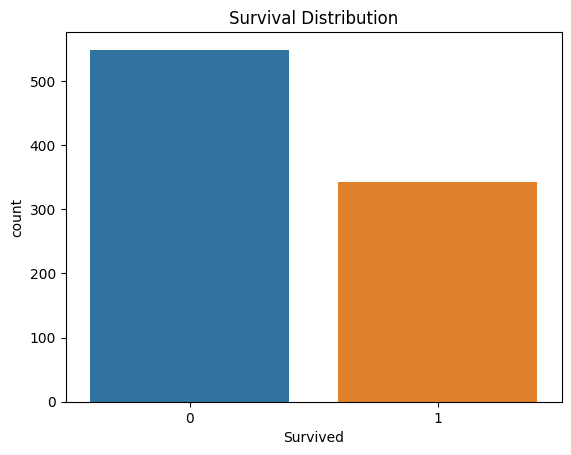

In [18]:
sns.countplot(x='Survived', data=train_df)
plt.title('Survival Distribution')
plt.show()

Text(0.5, 1.0, 'Survival Rate by Gender')

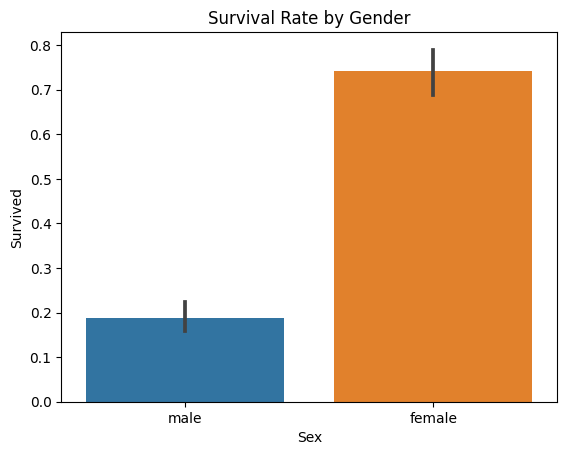

In [19]:
sns.barplot(x='Sex',y='Survived',data=train_df)
plt.title("Survival Rate by Gender")

Text(0.5, 1.0, 'Survival Rate by Class')

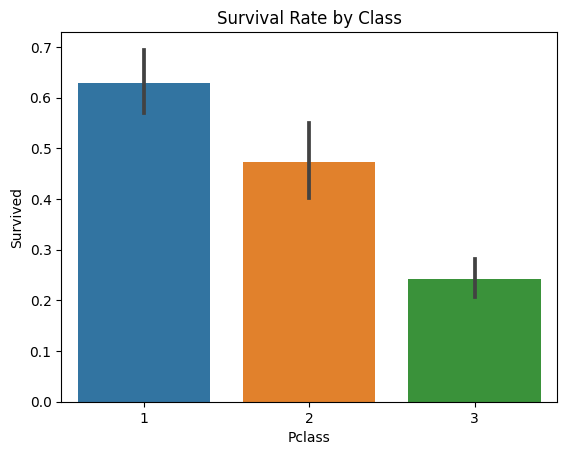

In [20]:
sns.barplot(x='Pclass',y='Survived',data=train_df)
plt.title("Survival Rate by Class")

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 1.0, 'Age Distribution by Survival')

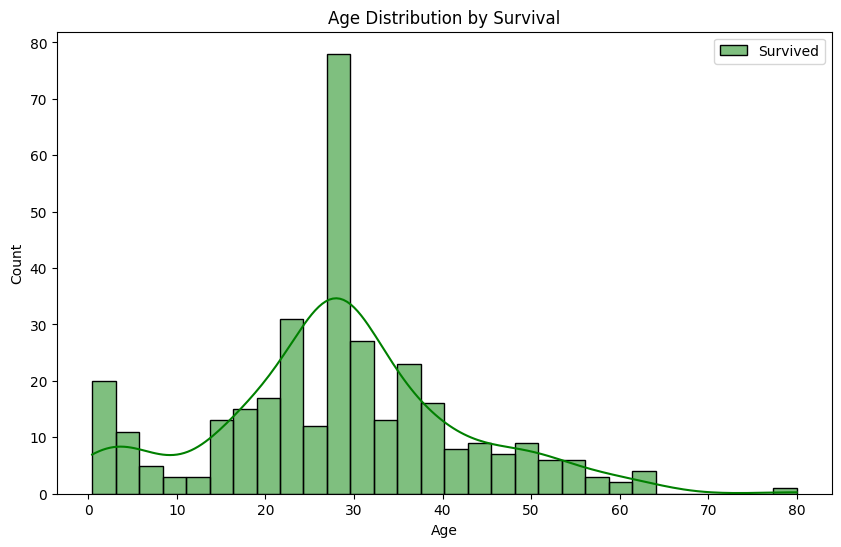

In [21]:
plt.figure(figsize=(10,6))
sns.histplot(train_df[train_df['Survived']==1]['Age'], color='green', bins=30, label='Survived', kde=True)
plt.legend()
plt.title('Age Distribution by Survival')

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 1.0, 'Age Distribution by Survival')

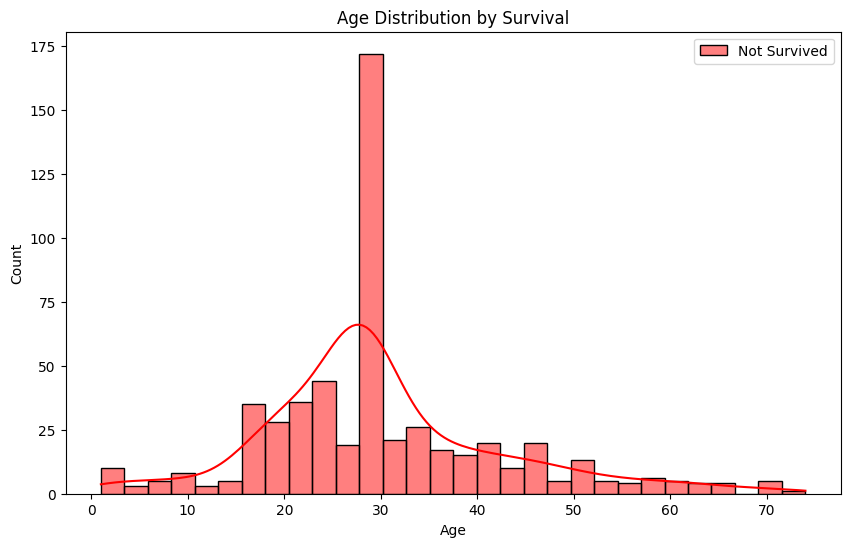

In [22]:
plt.figure(figsize=(10,6))
sns.histplot(train_df[train_df['Survived']==0]['Age'], color='red', bins=30, label='Not Survived', kde=True)
plt.legend()
plt.title('Age Distribution by Survival')

/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


<Axes: xlabel='AgeBin', ylabel='Survived'>

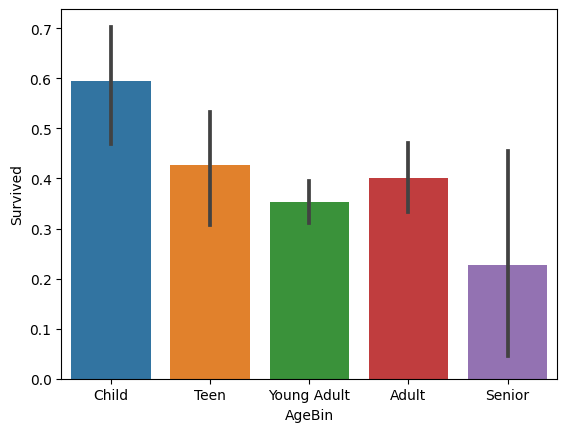

In [23]:
train_df['AgeBin'] = pd.cut(train_df['Age'], bins=[0,10,18,35,60,80], labels=['Child','Teen','Young Adult','Adult','Senior'])
sns.barplot(x='AgeBin', y='Survived', data=train_df)

/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


Text(0.5, 1.0, 'Survival by Fare Quartile')

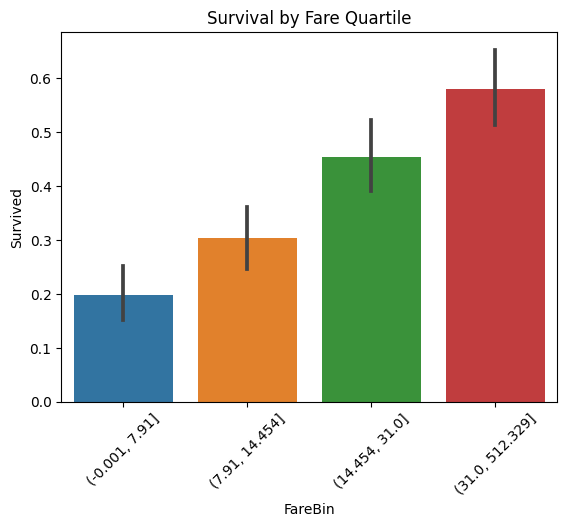

In [24]:
train_df['FareBin'] = pd.qcut(train_df['Fare'], 4)
sns.barplot(x='FareBin', y='Survived', data=train_df)
plt.xticks(rotation=45)
plt.title('Survival by Fare Quartile')

/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


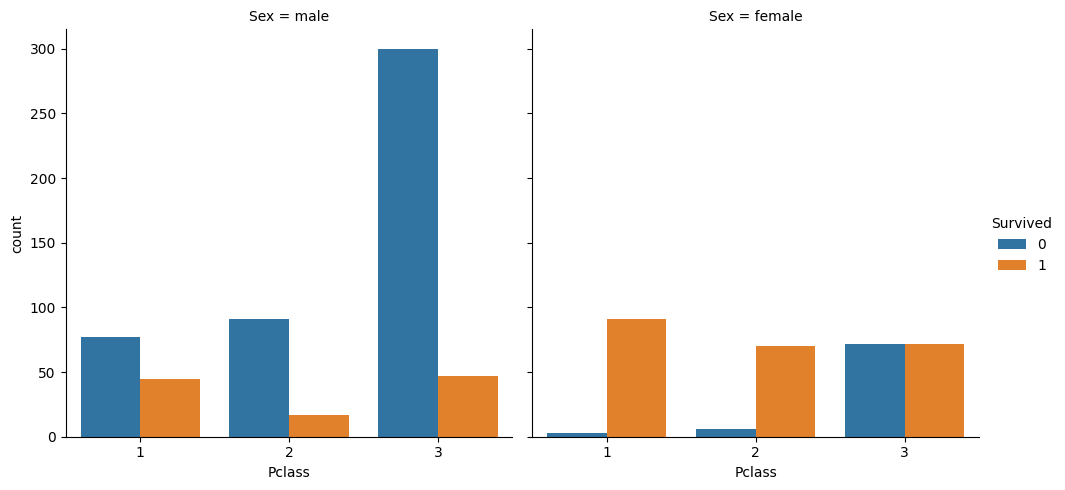

In [25]:
sns.catplot(x='Pclass', hue='Survived', col='Sex', kind='count', data=train_df)

<Axes: xlabel='FamilySize', ylabel='Survived'>

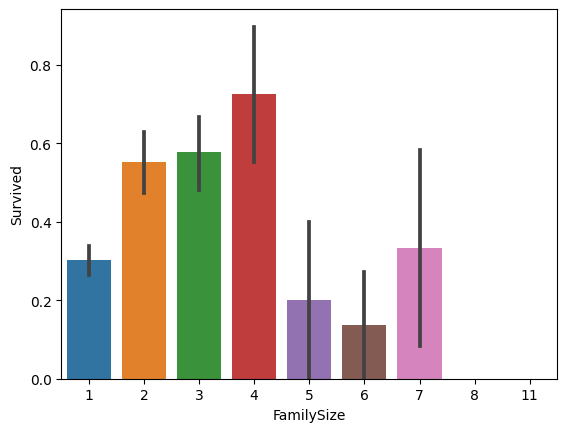

In [26]:
sns.barplot(x='FamilySize', y='Survived', data=train_df)

<Axes: xlabel='IsAlone', ylabel='Survived'>

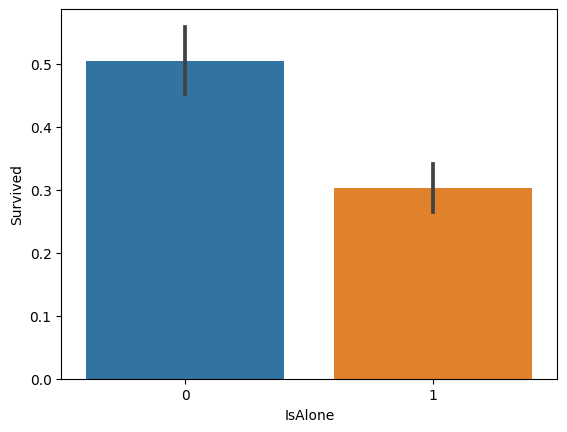

In [27]:
sns.barplot(x='IsAlone', y='Survived', data=train_df)

##  5. Feature Engineering (Part-2)

In [28]:
def feature_engineer(df):
    # Map gender
    df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})
    
    # Create family size
    df['FamilySize'] = df['SibSp'] + df['Parch'] + 1
    
    # Flag nuclear families
    df['IsNuclearFam'] = df['FamilySize'].apply(lambda x: 1 if 2 <= x <= 4 else 0)
    
    # Log transform Fare
    df['Fare_log'] = np.log1p(df['Fare'])
    
    # Fill missing Age
    df['Age'] = df['Age'].fillna(df['Age'].median())
    
    # Extract and clean Title from Name
    df['Title'] = df['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)
    df['Title'] = df['Title'].replace({
        'Mlle': 'Miss', 'Ms': 'Miss',
        'Mme': 'Mrs', 'Lady': 'Mrs', 'Dona': 'Mrs', 'Countess': 'Mrs',
        'Capt': 'Officer', 'Col': 'Officer', 'Major': 'Officer',
        'Dr': 'Officer', 'Rev': 'Clergy', 'Jonkheer': 'Royalty', 'Sir': 'Royalty',
        'Don': 'Royalty'
    })
    df['Title'] = df['Title'].fillna('None')

    # One-hot encode Pclass & Title
    df['Pclass'] = df['Pclass'].astype('category')
    df = pd.get_dummies(df, columns=['Pclass', 'Title'], drop_first=True)

    return df
train_df=feature_engineer(train_df)
test_df=feature_engineer(test_df)

In [29]:
train_df.describe

<bound method NDFrame.describe of      Survived                                               Name  Sex   Age  \
0           0                            Braund, Mr. Owen Harris    0  22.0   
1           1  Cumings, Mrs. John Bradley (Florence Briggs Th...    1  38.0   
2           1                             Heikkinen, Miss. Laina    1  26.0   
3           1       Futrelle, Mrs. Jacques Heath (Lily May Peel)    1  35.0   
4           0                           Allen, Mr. William Henry    0  35.0   
..        ...                                                ...  ...   ...   
886         0                              Montvila, Rev. Juozas    0  27.0   
887         1                       Graham, Miss. Margaret Edith    1  19.0   
888         0           Johnston, Miss. Catherine Helen "Carrie"    1  28.0   
889         1                              Behr, Mr. Karl Howell    0  26.0   
890         0                                Dooley, Mr. Patrick    0  32.0   

     SibSp  Parch

In [32]:
from sklearn.model_selection import train_test_split

In [33]:
features = [col for col in train_df.columns if col not in ['Survived', 'Name', 'Embarked']]

In [34]:
X = train_df[features]
y = train_df['Survived']

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=1)

In [38]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

In [39]:
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(n_estimators=100),
    "SVM": SVC(),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss', verbosity=0),
    "LightGBM": LGBMClassifier(verbose=-1),
    "CatBoost": CatBoostClassifier(verbose=0),
    "Gradient Boosting": GradientBoostingClassifier(),
    "AdaBoost": AdaBoostClassifier()
}

In [40]:
from sklearn.preprocessing import OrdinalEncoder

age_order = [['Child','Teen' ,'Young Adult', 'Adult', 'Senior']]
encoder = OrdinalEncoder(categories=age_order)

X_train['AgeBin'] = encoder.fit_transform(X_train[['AgeBin']])
X_val['AgeBin'] = encoder.transform(X_val[['AgeBin']])

In [41]:
fare_order = sorted(X_train['FareBin'].unique())  # usually ordered by price
fare_encoder = OrdinalEncoder(categories=[fare_order])

X_train['FareBin'] = fare_encoder.fit_transform(X_train[['FareBin']])
X_val['FareBin'] = fare_encoder.transform(X_val[['FareBin']])

In [42]:
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_val)
    acc = accuracy_score(y_val, y_pred)
    print(f"\n{name} Accuracy: {acc:.4f}")
    print(confusion_matrix(y_val, y_pred))
    print(classification_report(y_val, y_pred))


Logistic Regression Accuracy: 0.7989
[[94 12]
 [24 49]]
              precision    recall  f1-score   support

           0       0.80      0.89      0.84       106
           1       0.80      0.67      0.73        73

    accuracy                           0.80       179
   macro avg       0.80      0.78      0.79       179
weighted avg       0.80      0.80      0.80       179


Random Forest Accuracy: 0.7598
[[92 14]
 [29 44]]
              precision    recall  f1-score   support

           0       0.76      0.87      0.81       106
           1       0.76      0.60      0.67        73

    accuracy                           0.76       179
   macro avg       0.76      0.74      0.74       179
weighted avg       0.76      0.76      0.75       179


SVM Accuracy: 0.6648
[[97  9]
 [51 22]]
              precision    recall  f1-score   support

           0       0.66      0.92      0.76       106
           1       0.71      0.30      0.42        73

    accuracy                     

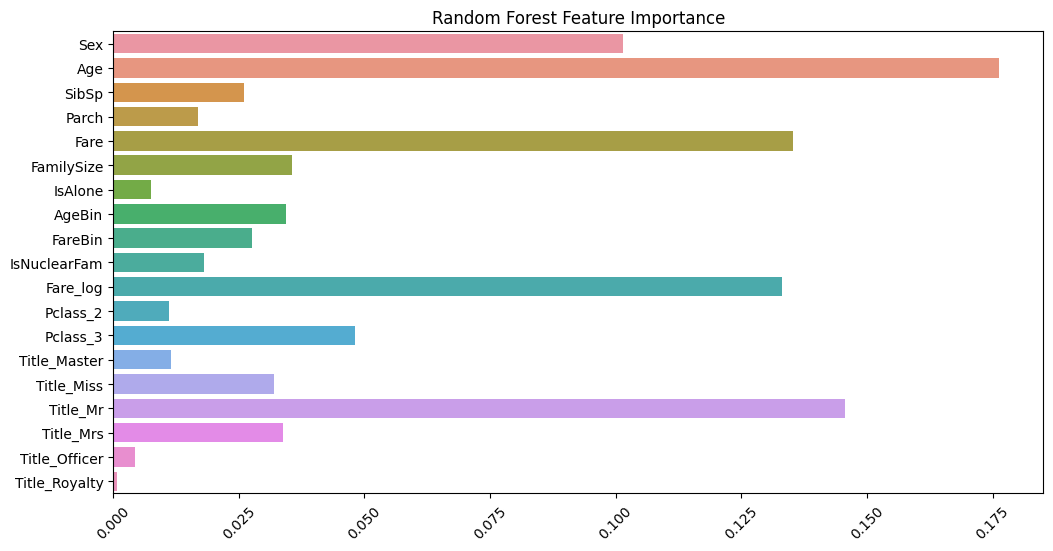

In [43]:
rf = models["Random Forest"]
importances = rf.feature_importances_
feat_names = X.columns

plt.figure(figsize=(12,6))
sns.barplot(x=importances, y=feat_names)
plt.title("Random Forest Feature Importance")
plt.xticks(rotation=45)
plt.show()